In [46]:
# import the necessary libraries 
import pandas as pd
import plotly.express  as px
import plotly.graph_objects as go

In [47]:
# importing the dataset

#dataset for matches statistics:
df1=pd.read_csv(r"C:\Users\dell\Desktop\AFCON project\ACON-2025-matches-stats.csv")
#dataset for players statistics:
df2=pd.read_csv(r"C:\Users\dell\Desktop\AFCON project\AFCON-2025-players-stats.csv")



# Part 1: Data manipulation 

In [48]:
# Create a new dataset containing the needed columns :
afcon=df1[['date_GMT','attendance','home_team_name','away_team_name','Game Week','home_team_goal_count','away_team_goal_count','total_goal_count','home_team_shots','away_team_shots','home_team_shots_on_target','away_team_shots_on_target','home_team_shots_off_target','away_team_shots_off_target','home_team_corner_count','away_team_corner_count','home_team_yellow_cards','away_team_yellow_cards','home_team_red_cards','away_team_red_cards','home_team_fouls','away_team_fouls','home_team_possession','away_team_possession','team_a_xg','team_b_xg','stadium_name']]
afcon.head()

,date_GMT,attendance,home_team_name,away_team_name,Game Week,home_team_goal_count,away_team_goal_count,total_goal_count,home_team_shots,away_team_shots,...,away_team_yellow_cards,home_team_red_cards,away_team_red_cards,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,stadium_name
0,Dec 21 2025 - 7:00pm,60180.0,Morocco,Comoros,1.0,2,0,2,16,4,...,1,0,0,19,20,70,30,2.12,0.48,Stade Moulay Abdallah
1,Dec 22 2025 - 2:00pm,10124.0,Mali,Zambia,1.0,1,1,2,15,7,...,1,0,0,15,13,53,47,1.61,0.84,Stade Mohamed V
2,Dec 22 2025 - 5:00pm,4013.0,South Africa,Angola,1.0,2,1,3,10,10,...,2,0,0,17,23,57,43,1.18,1.19,Stade de Marrakech
3,Dec 22 2025 - 8:00pm,28199.0,Egypt,Zimbabwe,1.0,2,1,3,35,8,...,2,0,0,13,15,77,23,3.65,0.87,Stade d'Agadir
4,Dec 23 2025 - 12:30pm,13073.0,Congo DR,Benin,1.0,1,0,1,11,12,...,3,0,0,16,11,40,60,1.18,1.14,Stade Al Medina


In [49]:
players=df2[['full_name','position','goals_overall','assists_overall','clean_sheets_overall','yellow_cards_overall','red_cards_overall']]
players.head()

,full_name,position,goals_overall,assists_overall,clean_sheets_overall,yellow_cards_overall,red_cards_overall
0,NaN,Midfielder,0,0,0,0,0
1,Aaron Appindangoye,Defender,0,0,0,0,0
2,Aaron Wan-Bissaka,Defender,0,0,1,0,0
3,Abde Ezzalzouli,Midfielder,0,1,5,0,0
4,Abdel Hakim Abdallah,Defender,0,0,2,0,0


In [50]:
# rename columns
new_col={'home_team_name':'team1','away_team_name':'team2','home_team_goal_count':'team1_goals','away_team_goal_count':'team2_goals','total_goal_count':'total_goals','home_team_shots':'team1_shots','away_team_shots':'team2_shots','home_team_shots_on_target':'team1_shots_on_target','away_team_shots_on_target':'team2_shots_on_target','home_team_shots_off_target':'team1_shots_off_target','away_team_shots_off_target':'team2_shots_off_target','home_team_corner_count':'team1_corners','away_team_corner_count':'team2_corners','home_team_yellow_cards':'team1_yellow_cards','away_team_yellow_cards':'team2_yellow_cards','home_team_red_cards':'team1_red_cards','away_team_red_cards':'team2_red_cards','home_team_fouls':'team1_fouls','away_team_fouls':'team2_fouls','home_team_possession':'team1_possession','away_team_possession':'team2_possession','team_a_xg':"team1_XG",'team_b_xg':"team2_XG"}
afcon.rename(new_col,inplace=True,axis=1)
afcon.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\973429086.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_GMT,attendance,team1,team2,Game Week,team1_goals,team2_goals,total_goals,team1_shots,team2_shots,...,team2_yellow_cards,team1_red_cards,team2_red_cards,team1_fouls,team2_fouls,team1_possession,team2_possession,team1_XG,team2_XG,stadium_name
0,Dec 21 2025 - 7:00pm,60180.0,Morocco,Comoros,1.0,2,0,2,16,4,...,1,0,0,19,20,70,30,2.12,0.48,Stade Moulay Abdallah
1,Dec 22 2025 - 2:00pm,10124.0,Mali,Zambia,1.0,1,1,2,15,7,...,1,0,0,15,13,53,47,1.61,0.84,Stade Mohamed V
2,Dec 22 2025 - 5:00pm,4013.0,South Africa,Angola,1.0,2,1,3,10,10,...,2,0,0,17,23,57,43,1.18,1.19,Stade de Marrakech
3,Dec 22 2025 - 8:00pm,28199.0,Egypt,Zimbabwe,1.0,2,1,3,35,8,...,2,0,0,13,15,77,23,3.65,0.87,Stade d'Agadir
4,Dec 23 2025 - 12:30pm,13073.0,Congo DR,Benin,1.0,1,0,1,11,12,...,3,0,0,16,11,40,60,1.18,1.14,Stade Al Medina


In [51]:
ply_new_col={'full_name':'player','goals_overall':'goals','assists_overall':'assists','clean_sheets_overall':'clean_sheets','yellow_cards_overall':'yellow_cards','red_cards_overall':'red_cards'}
players.rename(ply_new_col,axis=1,inplace=True)
players.head()


C:\Users\dell\AppData\Local\Temp\ipykernel_20028\2227786831.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,position,goals,assists,clean_sheets,yellow_cards,red_cards
0,NaN,Midfielder,0,0,0,0,0
1,Aaron Appindangoye,Defender,0,0,0,0,0
2,Aaron Wan-Bissaka,Defender,0,0,1,0,0
3,Abde Ezzalzouli,Midfielder,0,1,5,0,0
4,Abdel Hakim Abdallah,Defender,0,0,2,0,0


In [52]:
# show dataset informations
afcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_GMT                52 non-null     object 
 1   attendance              52 non-null     float64
 2   team1                   52 non-null     object 
 3   team2                   52 non-null     object 
 4   Game Week               36 non-null     float64
 5   team1_goals             52 non-null     int64  
 6   team2_goals             52 non-null     int64  
 7   total_goals             52 non-null     int64  
 8   team1_shots             52 non-null     int64  
 9   team2_shots             52 non-null     int64  
 10  team1_shots_on_target   52 non-null     int64  
 11  team2_shots_on_target   52 non-null     int64  
 12  team1_shots_off_target  52 non-null     int64  
 13  team2_shots_off_target  52 non-null     int64  
 14  team1_corners           52 non-null     int6

In [53]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player        555 non-null    object
 1   position      556 non-null    object
 2   goals         556 non-null    int64 
 3   assists       556 non-null    int64 
 4   clean_sheets  556 non-null    int64 
 5   yellow_cards  556 non-null    int64 
 6   red_cards     556 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 30.5+ KB


In [54]:
# detecting duplicate lines
print(afcon.duplicated().sum())
print(players.duplicated().sum())

0
0


In [55]:
# Changing data types
afcon["date_GMT"]=pd.to_datetime(afcon["date_GMT"])
afcon["attendance"]=afcon["attendance"].astype(int)
afcon["Game Week"]=afcon["Game Week"].astype("object")
print(afcon.dtypes)
print("=======================================================")
print(players.dtypes)


date_GMT                  datetime64[ns]
attendance                         int64
team1                             object
team2                             object
Game Week                         object
team1_goals                        int64
team2_goals                        int64
total_goals                        int64
team1_shots                        int64
team2_shots                        int64
team1_shots_on_target              int64
team2_shots_on_target              int64
team1_shots_off_target             int64
team2_shots_off_target             int64
team1_corners                      int64
team2_corners                      int64
team1_yellow_cards                 int64
team2_yellow_cards                 int64
team1_red_cards                    int64
team2_red_cards                    int64
team1_fouls                        int64
team2_fouls                        int64
team1_possession                   int64
team2_possession                   int64
team1_XG        

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\2774873732.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\2774873732.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\2774873732.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dell\AppData\Local\Temp\ipy

In [56]:
# handling missing values
print(afcon.isna().sum())
print("======================================================================")
print(players.isna().sum())

date_GMT                   0
attendance                 0
team1                      0
team2                      0
Game Week                 16
team1_goals                0
team2_goals                0
total_goals                0
team1_shots                0
team2_shots                0
team1_shots_on_target      0
team2_shots_on_target      0
team1_shots_off_target     0
team2_shots_off_target     0
team1_corners              0
team2_corners              0
team1_yellow_cards         0
team2_yellow_cards         0
team1_red_cards            0
team2_red_cards            0
team1_fouls                0
team2_fouls                0
team1_possession           0
team2_possession           0
team1_XG                   0
team2_XG                   0
stadium_name               0
dtype: int64
player          1
position        0
goals           0
assists         0
clean_sheets    0
yellow_cards    0
red_cards       0
dtype: int64


In [57]:
# Fill in the missing values ​​in "Game Week" column with "Knockout Stage"
afcon["Game Week"].fillna("Knockout Stage",inplace=True)
afcon["Game Week"]=afcon["Game Week"].replace({1.0:"Matchday 1",2.0:"Matchday 2",3.0:"Matchday 3"}) 



C:\Users\dell\AppData\Local\Temp\ipykernel_20028\3149746700.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\dell\AppData\Local\Temp\ipykernel_20028\3149746700.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\3149746700.py:3: SettingWithCopyWarning:


A value is trying to be set o

In [58]:
# Drop rows with missing values
players=players.dropna(subset="player").reset_index(drop=True)
players

,player,position,goals,assists,clean_sheets,yellow_cards,red_cards
0,Aaron Appindangoye,Defender,0,0,0,0,0
1,Aaron Wan-Bissaka,Defender,0,0,1,0,0
2,Abde Ezzalzouli,Midfielder,0,1,5,0,0
3,Abdel Hakim Abdallah,Defender,0,0,2,0,0
4,Abdelhamid Ait Boudlal,Defender,0,0,0,0,0
...,...,...,...,...,...,...,...
550,Zaydou Youssouf,Midfielder,0,0,2,0,0
551,Zineddine Belaïd,Defender,1,0,2,0,0
552,Zito Luvumbo,Forward,0,0,1,1,0
553,Zizo,Midfielder,0,1,3,0,0


In [59]:
# cheking
print(afcon.isna().sum())
print("===================================================")
print(players.isna().sum())

date_GMT                  0
attendance                0
team1                     0
team2                     0
Game Week                 0
team1_goals               0
team2_goals               0
total_goals               0
team1_shots               0
team2_shots               0
team1_shots_on_target     0
team2_shots_on_target     0
team1_shots_off_target    0
team2_shots_off_target    0
team1_corners             0
team2_corners             0
team1_yellow_cards        0
team2_yellow_cards        0
team1_red_cards           0
team2_red_cards           0
team1_fouls               0
team2_fouls               0
team1_possession          0
team2_possession          0
team1_XG                  0
team2_XG                  0
stadium_name              0
dtype: int64
player          0
position        0
goals           0
assists         0
clean_sheets    0
yellow_cards    0
red_cards       0
dtype: int64


In [60]:
# handling time series data:
afcon["date_GMT"]=afcon["date_GMT"].dt.date
afcon.rename({"date_GMT":"date"},inplace=True,axis=1)
afcon.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\438772934.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\438772934.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,attendance,team1,team2,Game Week,team1_goals,team2_goals,total_goals,team1_shots,team2_shots,...,team2_yellow_cards,team1_red_cards,team2_red_cards,team1_fouls,team2_fouls,team1_possession,team2_possession,team1_XG,team2_XG,stadium_name
0,2025-12-21,60180,Morocco,Comoros,Matchday 1,2,0,2,16,4,...,1,0,0,19,20,70,30,2.12,0.48,Stade Moulay Abdallah
1,2025-12-22,10124,Mali,Zambia,Matchday 1,1,1,2,15,7,...,1,0,0,15,13,53,47,1.61,0.84,Stade Mohamed V
2,2025-12-22,4013,South Africa,Angola,Matchday 1,2,1,3,10,10,...,2,0,0,17,23,57,43,1.18,1.19,Stade de Marrakech
3,2025-12-22,28199,Egypt,Zimbabwe,Matchday 1,2,1,3,35,8,...,2,0,0,13,15,77,23,3.65,0.87,Stade d'Agadir
4,2025-12-23,13073,Congo DR,Benin,Matchday 1,1,0,1,11,12,...,3,0,0,16,11,40,60,1.18,1.14,Stade Al Medina


# Part 2: Data visualization

<h2> Goals anlysis </h2>


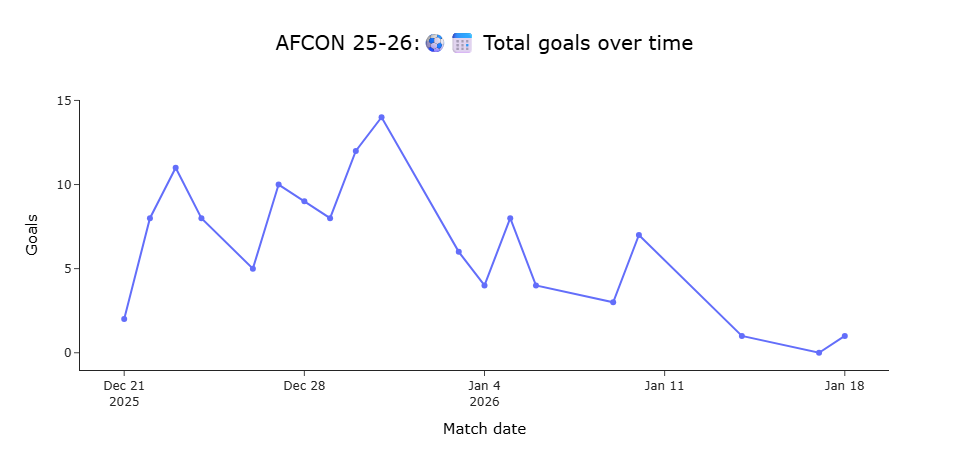

In [ ]:
# Total Goals over time 
time_goals=afcon.groupby("date")["total_goals"].sum()
fig=px.line(time_goals,title="AFCON 25-26:⚽📅 Total goals over time",markers=True,labels={"value":"Goals"})
fig.update_layout(xaxis_title="Match date",yaxis_title="Goals",template="simple_white",showlegend=False,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.show()
from IPython.display import Image, display

display(Image("newplot.png"))





In [62]:
#distribution of goals per matches :
fig=px.histogram(afcon,x="total_goals",title="AFCON 25-26: Distribution of Goals per matches",color_discrete_sequence=["#02C92A"]) 
fig.update_layout(xaxis_title="Total Goals",yaxis_title="Number of matches",bargap=0.2,width=1000,height=500,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(color="black",size=15),yaxis_title_font=dict(color="black",size=15))
fig.update_traces(marker_line_color='black',marker_line_width=1)
fig.show()


In [63]:
# Distribution of goals in each stadiums :
stadium_goals=afcon.groupby("stadium_name")["total_goals"].sum().sort_values()
fig=px.bar(stadium_goals,title="AFCON 25-26: Distribution of goals in each stadiums",color_discrete_sequence=["#9d76cc"],orientation="h",labels={"value":"Goals","stadium_name":"Stadium"},text_auto=True) 
fig.update_layout(xaxis_title="Total Goals",yaxis_title="Stadium",bargap=0.2,width=1000,height=500,showlegend=False,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color='black',marker_line_width=1)
fig.show()

In [64]:
# Distribution of Goals per stage : 
group_stage=["Matchday 1","Matchday 2","Matchday 3"]
group_stage_goals=afcon[afcon["Game Week"].isin(group_stage)][["total_goals"]].sum()
Knockout_stage_goals=afcon[afcon["Game Week"]=="Knockout Stage"][["total_goals"]].sum()
stage=["Group Stage","Knockout Stage"]
goals=[int(group_stage_goals),int(Knockout_stage_goals)]
fig=px.bar(x=stage,y=goals,title="AFCON 25-26: Distribution of Goals per stage ",color_discrete_sequence=["#34ebe8"],labels={"y":"Goals"},text_auto=True)
fig.update_layout(xaxis_title="Stages",yaxis_title="Goals",bargap=0.3,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color='black',marker_line_width=1)
fig.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20028\774243990.py:6: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [65]:
# goals Vs shots
team_stat = pd.concat([afcon[["team1","team1_goals","team1_shots","team1_shots_on_target","team1_possession","team1_fouls","team1_red_cards","team1_yellow_cards"]].rename(columns={"team1":"Team","team1_goals":"Goals","team1_shots":"Shots","team1_shots_on_target":"Shots on target","team1_possession":"Possession","team1_fouls":"Fouls","team1_red_cards":"Red cards","team1_yellow_cards":"Yellow cards"}),afcon[["team2","team2_goals","team2_shots","team2_shots_on_target","team2_possession","team2_fouls","team2_red_cards","team2_yellow_cards"]].rename(columns={"team2": "Team","team2_goals":"Goals","team2_shots":"Shots","team1_shots_on_target":"Shots on target","team2_possession":"Possession","team2_fouls":"Fouls","team2_red_cards":"Red cards","team2_yellow_cards":"Yellow cards"})],axis=0)
goals=team_stat.groupby("Team")["Goals"].sum()
shots=team_stat.groupby("Team")["Shots"].sum()
fig=px.scatter(x=shots,y=goals,title="AFCON 25-26: Goals scored VS Shots ",color=goals.index, labels={"x": "Shots","y":"Goals","color":"Team"})
fig.update_layout(width=1200,height=600,legend_title_text="Team :",title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker=dict(size=12,line=dict(width=1,color="black")),opacity=0.8)
fig.show()

In [66]:
# goals VS shots on target 
shots_on_target=team_stat.groupby("Team")["Shots on target"].sum()
fig=px.scatter(x=shots_on_target,y=goals,title="AFCON 25-26: Goals scored VS Shots on target ",color=goals.index, labels={"x": "Shots on target","y":"Goals","color":"Team"})
fig.update_layout(width=1200,height=600,legend_title_text="Team :",title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker=dict(size=12,line=dict(width=1,color="black")))
fig.show()

In [67]:
# shots VS shots on target :
fig=px.scatter(x=shots,y=shots_on_target,title="AFCON 25-26: Shots VS Shots on target ",color=goals.index, labels={"x": "Shots","y":"Shots on target","color":"Team"})
fig.update_layout(width=1200,height=600,legend_title_text="Team :",title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker=dict(size=12,line=dict(width=1,color="black")))
fig.show()

<h2> Teams anlysis </h2>


In [68]:
#The top 10 goal scoring teams
scoring_team=team_stat.groupby("Team")["Goals"].sum().sort_values(ascending=False).head(10)
fig=px.bar(x=scoring_team.index,y=scoring_team.values,title=" AFCON 25-26:⚽Top 10 Goal-scoring teams",labels={"x":"Team","y":"Goals"},color_discrete_sequence=["#08a647"],text_auto=True)
fig.update_layout(width=1000,height=600,bargap=0.3,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color="black",marker_line_width=1)
fig.show()

In [69]:
# The top 5 shooting teams :
shots_team=shots.sort_values(ascending=False).head(5)
fig=px.bar(x=shots_team.index,y=shots_team.values,title="AFCON 25-26: The top 5 shooting teams ",labels={"x":"Team","y":"Shots"},text_auto=True)
fig.update_layout(bargap=0.3,width=1000,height=550,showlegend=False,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color='black',marker_line_width=1)
fig.show()

In [70]:
#shot_effinciety
goals=team_stat.groupby("Team")["Goals"].sum()
shots=team_stat.groupby("Team")["Shots"].sum()
shot_effinciety=goals/shots.replace(0,1)
eff=shot_effinciety.sort_values().tail(5)
fig=px.bar(x=eff.values,y=eff.index,title="AFCON 25-26: Top 5 teams by Shots effinciety",labels={"x":"Shot effinciety","y":"Team"},color_discrete_sequence=["orange"])
fig.update_layout(width=1100,height=500,bargap=0.4,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color='black',marker_line_width=1)
fig.show()

In [71]:
#The top 8 teams with the highest possession :
possession_team=team_stat.groupby("Team")["Possession"].mean().sort_values(ascending=False).head(8)
fig=px.bar(x=possession_team.index,y=possession_team.values,title="AFCON 25-26: The top 8 teams with the highest possession",labels={"x":"Team","y":"Possession (%)"})
fig.update_layout(width=1000,height=600,bargap=0.3,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color='black',marker_line_width=1,marker_color="#fcf912")
fig.show()

In [72]:
# Teams with the most fouls committed 
foul_team=team_stat.groupby("Team")["Fouls"].sum().sort_values(ascending=False).head(10)
fig=px.bar(x=foul_team.index,y=foul_team.values,title="AFCON 25-26: Teams with the most fouls committed ",labels={"x":"Team","y":"Fouls"})
fig.update_layout(width=1000,height=600,bargap=0.3,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_color="#a6fa0a",marker_line_color="black")
fig.show()

In [73]:
# Teams with the most red cards :
red_cards_team=team_stat.groupby("Team")["Red cards"].sum().sort_values(ascending=False).head(7)
fig=px.bar(x=red_cards_team.index,y=red_cards_team.values,title="AFCON 25-26:🟥 Teams with the most red cards ",labels={"x":"Team","y":"Red cards"})
fig.update_traces(marker_line_color="black",marker_color="#fa1616",marker_line_width=1)
fig.update_layout(title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.show()

In [74]:
# Teams with the most yellow cards :
yellow_cards_team=team_stat.groupby("Team")["Yellow cards"].sum().sort_values(ascending=False).head(10)
fig=px.bar(x=yellow_cards_team.index,y=yellow_cards_team.values,title="AFCON 25-26: 🟨 Teams with the most yellow cards ",labels={"x":"Team","y":"Yellow cards"})
fig.update_traces(marker_line_color="black",marker_color="#faf216",marker_line_width=1)
fig.update_layout(height=500,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.show()

In [75]:
#The distribution of the matches per stadiums :
fig=px.pie(afcon,names="stadium_name",title="AFCON 25-26: 🏟️🗓️Distribution of matches per stadiums ",labels={"stadium_name":"Stadium"})
fig.update_layout(showlegend=True,template="simple_white",width=900,legend_title_text="Stadium :",title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(textinfo="percent",marker_line_color="black",marker_line_width=0.6)
fig.show()

## 

<h2> Players anlysis </h2>

In [76]:
players.head()

,player,position,goals,assists,clean_sheets,yellow_cards,red_cards
0,Aaron Appindangoye,Defender,0,0,0,0,0
1,Aaron Wan-Bissaka,Defender,0,0,1,0,0
2,Abde Ezzalzouli,Midfielder,0,1,5,0,0
3,Abdel Hakim Abdallah,Defender,0,0,2,0,0
4,Abdelhamid Ait Boudlal,Defender,0,0,0,0,0


In [77]:
#Top Goals Scorers
top_scorers=players.groupby("player")["goals"].sum().sort_values().tail(9)
fig=px.bar(x=top_scorers.values,y=top_scorers.index,title="AFCON 25-26:⚽ Top Goals Scorers ",labels={"x":"Goals","y":"Players"})
fig.update_layout(bargap=0.2,height=560,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color="black",marker_line_width=1,marker_color="#16fae7")
fig.show()


In [78]:
#Players with the most assists
top_assist=players.groupby("player")["assists"].sum().sort_values().tail(11)
fig=px.bar(x=top_assist.values,y=top_assist.index,title="AFCON 25-26:🅰️ Players with the most assists",labels={"x":"Assists","y":"Players"})
fig.update_layout(bargap=0.2,height=560,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color="black",marker_line_width=1,marker_color="#16faae")
fig.show()

In [79]:
# Top clean sheets
goal_kepper=players[players["position"]=="Goalkeeper"]
clean_sheet=goal_kepper.groupby("player")["clean_sheets"].sum().sort_values().tail(7)
fig=px.bar(x=clean_sheet.values,y=clean_sheet.index,title="AFCON 25-26:🧤🧤 Top Clean Sheets ",labels={"x":"Clean Sheets","y":"Players"})
fig.update_layout(bargap=0.2,height=560,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color="black",marker_line_width=1,marker_color="#c916fa")
fig.show()

In [80]:
#Players with red cards :
red_cards_player=players.groupby("player")["red_cards"].sum().sort_values().tail(9)
fig=px.bar(x=red_cards_player.index,y=red_cards_player.values,title="AFCON 25-26:🟥 Players with red cards  ",labels={"x":"Player","y":"Red cards"})
fig.update_layout(bargap=0.2,height=560,title_x=0.5,title_font=dict(size=20),xaxis_title_font=dict(size=15),yaxis_title_font=dict(size=15))
fig.update_traces(marker_line_color="black",marker_line_width=1,marker_color="#fa1657")
fig.show()

In [81]:
# Creat a new column containing the contributions of players 
players["Goals + Assists"]=players["goals"]+players["assists"]
players.head()

,player,position,goals,assists,clean_sheets,yellow_cards,red_cards,Goals + Assists
0,Aaron Appindangoye,Defender,0,0,0,0,0,0
1,Aaron Wan-Bissaka,Defender,0,0,1,0,0,0
2,Abde Ezzalzouli,Midfielder,0,1,5,0,0,1
3,Abdel Hakim Abdallah,Defender,0,0,2,0,0,0
4,Abdelhamid Ait Boudlal,Defender,0,0,0,0,0,0


In [82]:
#Top contributors
fig = go.Figure()
players_sorted=players.sort_values(by="Goals + Assists").tail(10)
fig.add_bar(y=players_sorted["player"],x=players_sorted["goals"],orientation='h',name='Goals',marker_color="#02C92A")
fig.add_bar(y=players_sorted["player"],x=players_sorted["assists"],orientation='h',name='Assists',marker_color="#fa9405")
fig.update_layout(title="AFCON 25-26: Top Contributors (G+A)",xaxis_title="Contributions",yaxis_title="players",bargap=0.3,height=550,title_x=0.5,title_font=dict(size=20,color="black"),xaxis_title_font=dict(size=15,color="black"),yaxis_title_font=dict(size=15,color="black"))
fig.update_traces(marker_line_color="black")
fig.show()
